In [32]:
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D, LeakyReLU
from tensorflow.keras import layers, losses
from tensorflow.keras.optimizers import Adam
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from enum import Enum
import PIL
import PIL.Image
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping 
from PIL import Image
import random

In [33]:
cnn = Sequential()
cnn.add(Conv2D(64, (3, 3), activation='relu', input_shape=(50, 100, 1)))
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Conv2D(128, (3, 3), activation='relu'))
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Conv2D(256, (3, 3), activation='relu'))
cnn.add(Flatten())
cnn.add(Dense(256, activation='relu'))
cnn.add(Dense(50 * 100, activation='sigmoid'))
cnn.add(Reshape((50, 100)))

In [34]:
class AutoencoderWithDense(Model):
    def __init__(self, latent_dim, dropout_rate=0.2):
        super(AutoencoderWithDense, self).__init__()
        self.latent_dim = latent_dim   
        self.encoder = tf.keras.Sequential([
            layers.Flatten(),
            layers.Dense(1024, activation="relu"), # Added Dense
            layers.Dropout(dropout_rate), 
            layers.Dense(512, activation="relu"), # Added Dense
            layers.Dropout(dropout_rate), 
            layers.Dense(latent_dim, activation='relu'),
            ])
        self.decoder = tf.keras.Sequential([

            layers.Dense(512, activation="relu"), # Added Dense
            layers.Dropout(dropout_rate), 
            layers.Dense(1024, activation="relu"), # Added Dense
            layers.Dropout(dropout_rate), 
            layers.Dense(50 * 100, activation='sigmoid'),
            layers.Reshape((50, 100)) # is reversed from other functions
            # layers.Reshape((100, 200)) # is reversed from other functions
            ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [35]:
autoencoder_with_dense = AutoencoderWithDense(latent_dim = 250)
autoencoder_with_dense.build(input_shape=(None, 50, 100, 1))

In [36]:
cnn.load_weights('/Users/miranyildirim/Desktop/DIS/Neural/final/TomJerryDoodles/src/SavedModels/CNN.keras')
autoencoder_with_dense.load_weights('/Users/miranyildirim/Desktop/DIS/Neural/final/TomJerryDoodles/src/SavedModels/DenseModel.keras')

In [37]:
def loadImage(input_file_path, output_file_path, image_shape=(400, 200), isRGB = True): 
    input_image = Image.open(input_file_path).resize(image_shape)
    output_image = Image.open(output_file_path).resize(image_shape)
    beforeGrayScale = np.array(input_image)
   
    if not isRGB: 
        input_image = input_image.convert("L")
        output_image = output_image.convert("L")

    return np.array(input_image)/118.0, np.array(output_image)/255.0


In [38]:
personal_image_shape = (100, 50)

filenames_tom = ["frame245.jpg", "frame366.jpg", "frame408.jpg", "frame458.jpg", "frame771.jpg", "frame2110.jpg", "frame3665.jpg", "frame4427.jpg"]
filenames_jerry = ["frame616.jpg", "frame829.jpg", "frame1641.jpg", "frame2321.jpg", "frame2715.jpg", "frame2836.jpg", "frame3003.jpg", "frame5248.jpg"]

inputImageBasepathTom = r'/Users/miranyildirim/Desktop/DIS/Neural/final/TomJerryDoodles/images_to_display/tom edge detected/' 
outputImageBasepathTom = r'/Users/miranyildirim/Desktop/DIS/Neural/final/TomJerryDoodles/images_to_display/tom/'

inputImageBasepathJerry = r'/Users/miranyildirim/Desktop/DIS/Neural/final/TomJerryDoodles/images_to_display/jerry edge detected/'
outputImageBasepathJerry = r'/Users/miranyildirim/Desktop/DIS/Neural/final/TomJerryDoodles/images_to_display/jerry/'

inputImages = []
outputImages = []

# Loop for Tom images
for filename in filenames_tom:
    inputImagePathTom = f"{inputImageBasepathTom}{filename}"
    outputImagePathTom = f"{outputImageBasepathTom}{filename}"
    inputImageTom, imageLabelTom = loadImage(inputImagePathTom, outputImagePathTom, personal_image_shape, isRGB=False)
    inputImages.append(inputImageTom)  # Add each Tom input image
    outputImages.append(imageLabelTom)  # Add each Tom output image

# Loop for Jerry images
for filename in filenames_jerry:
    inputImagePathJerry = f"{inputImageBasepathJerry}{filename}"
    outputImagePathJerry = f"{outputImageBasepathJerry}{filename}"
    inputImageJerry, imageLabelJerry = loadImage(inputImagePathJerry, outputImagePathJerry, personal_image_shape, isRGB=False)
    inputImages.append(inputImageJerry)  # Add each Jerry input image
    outputImages.append(imageLabelJerry)  # Add each Jerry output image

# Convert lists to numpy arrays
inputImagesArray = np.array(inputImages)
outputImagesArray = np.array(outputImages)



In [39]:
print("Input Images Shape:", inputImagesArray.shape)
print("Output Images Shape:", outputImagesArray.shape)

Input Images Shape: (16, 50, 100)
Output Images Shape: (16, 50, 100)


In [40]:
cnn_model_output = cnn.predict(np.array(inputImagesArray))
dense_model_output = autoencoder_with_dense.predict(np.array(inputImagesArray))

1/1 [==============================] - 0s 84ms/step


In [43]:
def display_images(edge_filtered, cnn_output, dense_output, ground_truth):
    plt.figure(figsize=(20, 5))

    plt.subplot(1, 4, 1)
    plt.imshow(edge_filtered, cmap='gray') 
    plt.title('Edge Filtered')
    plt.axis('off')

    plt.subplot(1, 4, 2)
    plt.imshow(cnn_output, cmap='gray')  
    plt.title('CNN Output')
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.imshow(dense_output, cmap='gray') 
    plt.title('Dense Model Output')
    plt.axis('off')

    plt.subplot(1, 4, 4)
    plt.imshow(ground_truth, cmap='gray')  
    plt.title('Ground Truth')
    plt.axis('off')

    plt.show()


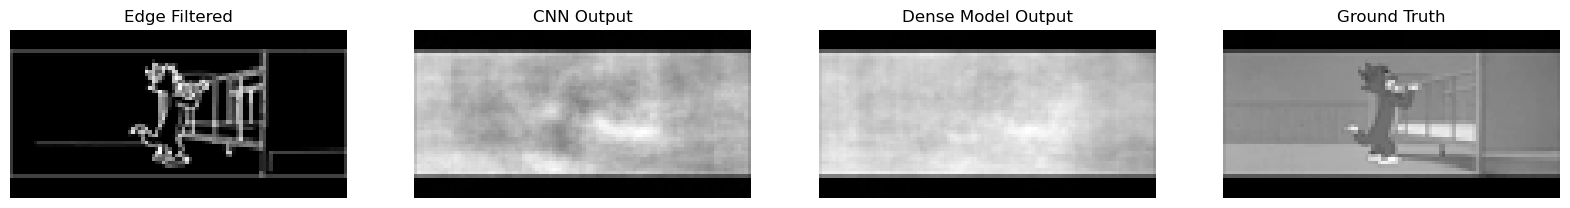

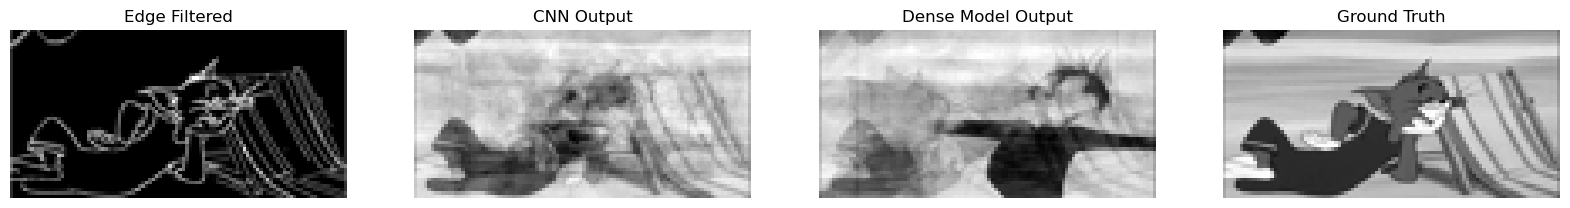

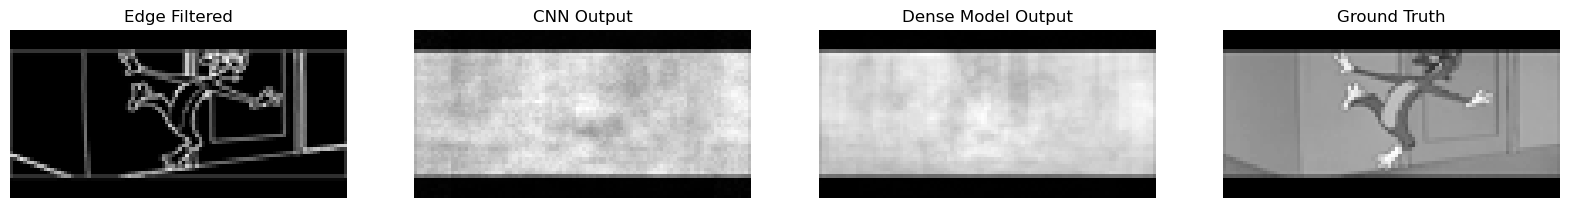

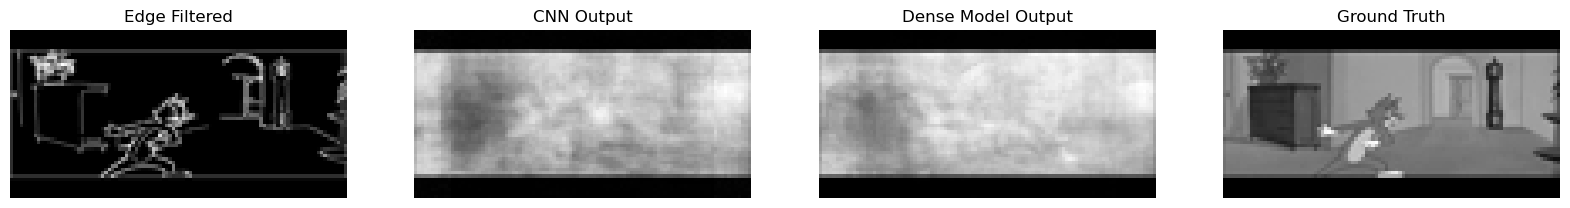

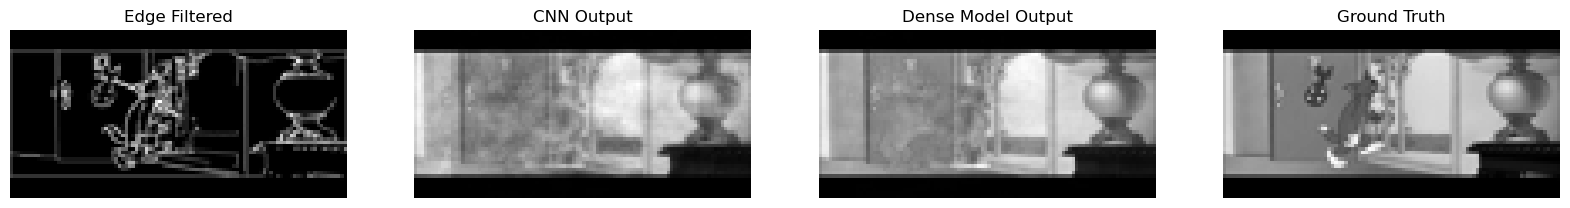

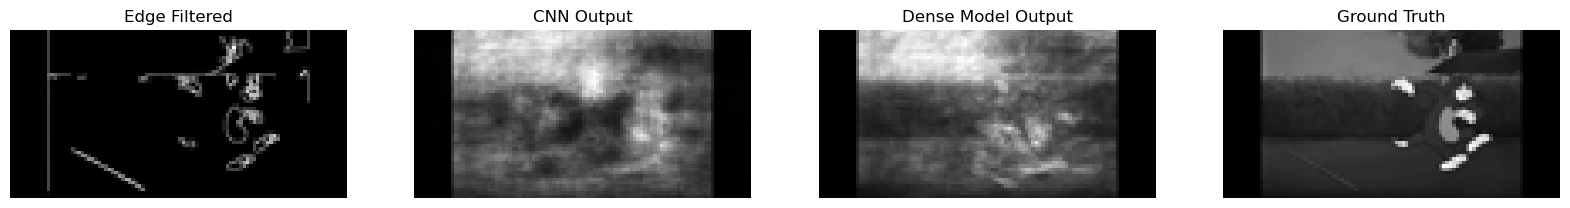

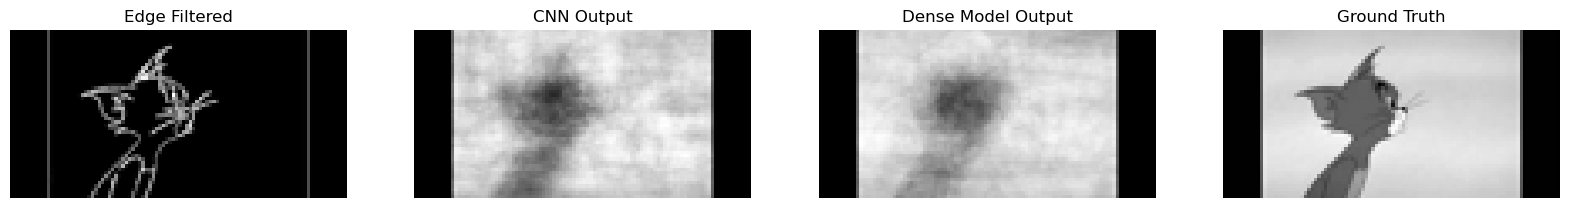

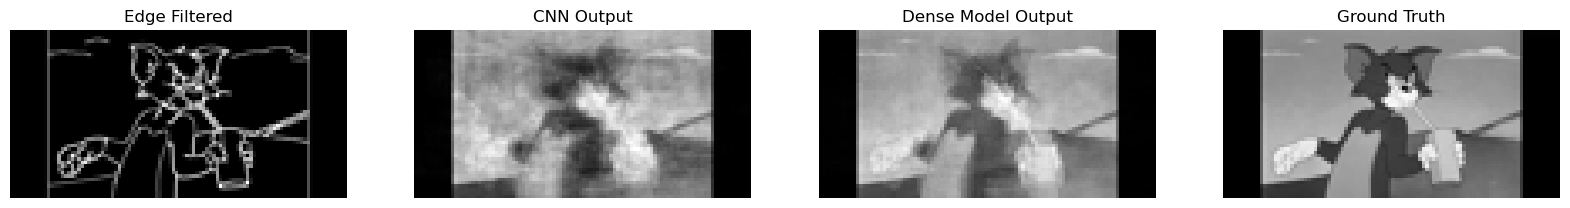

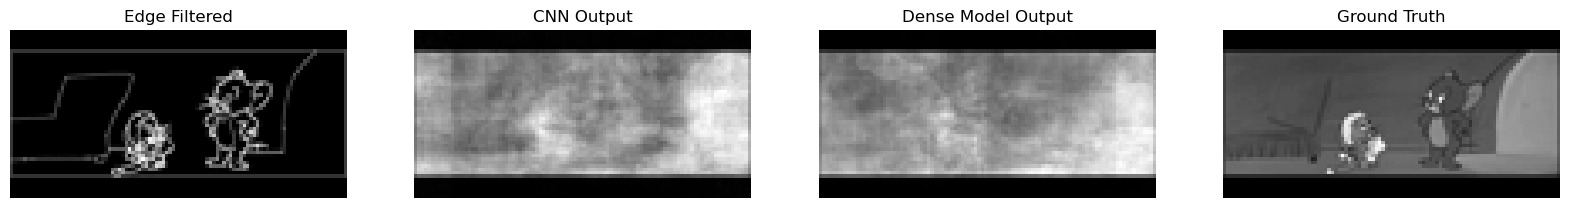

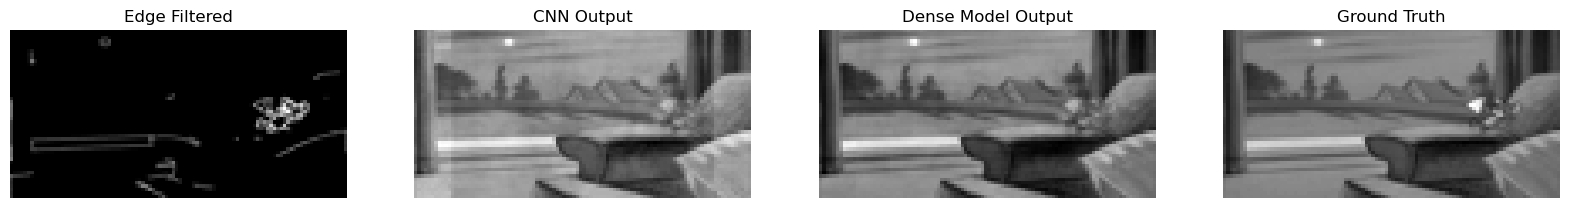

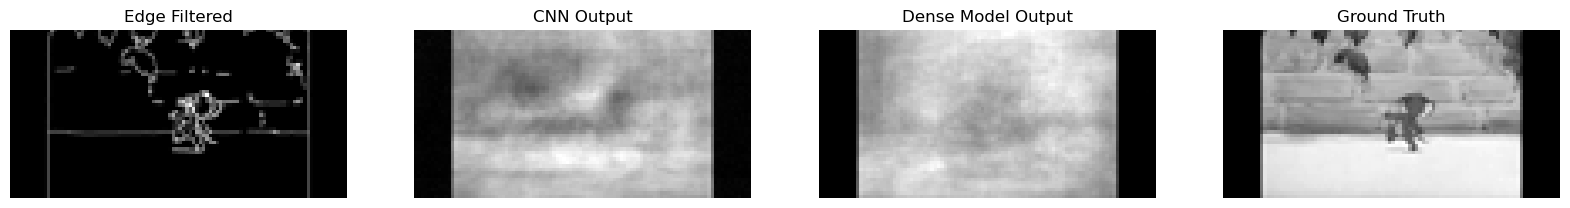

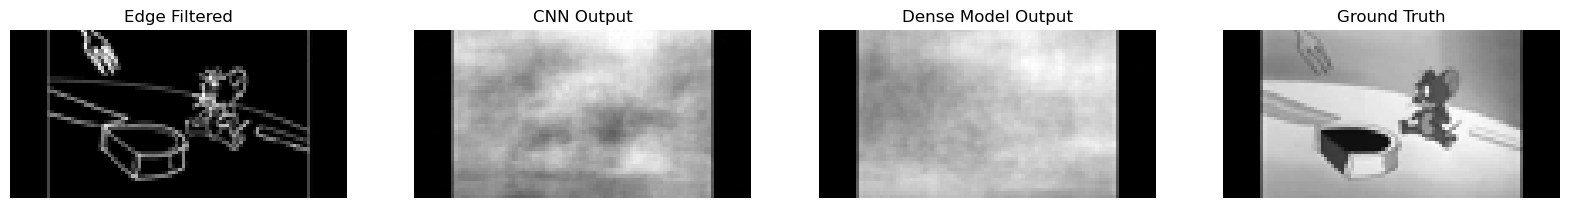

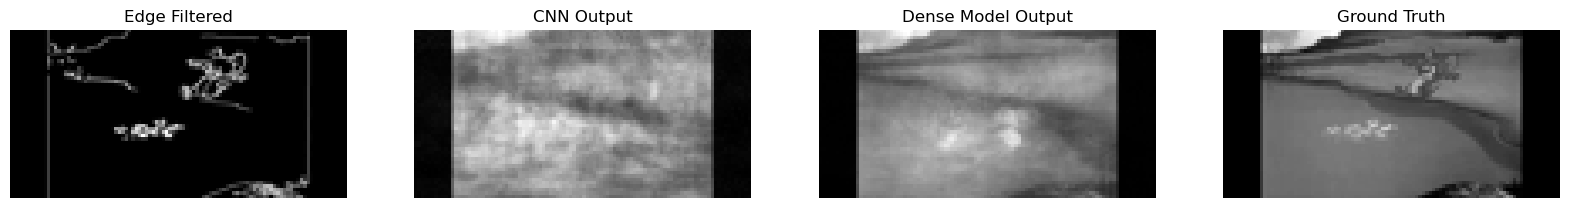

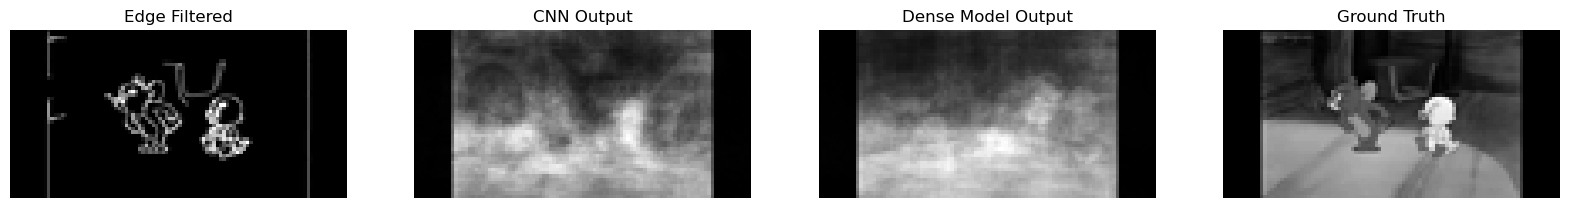

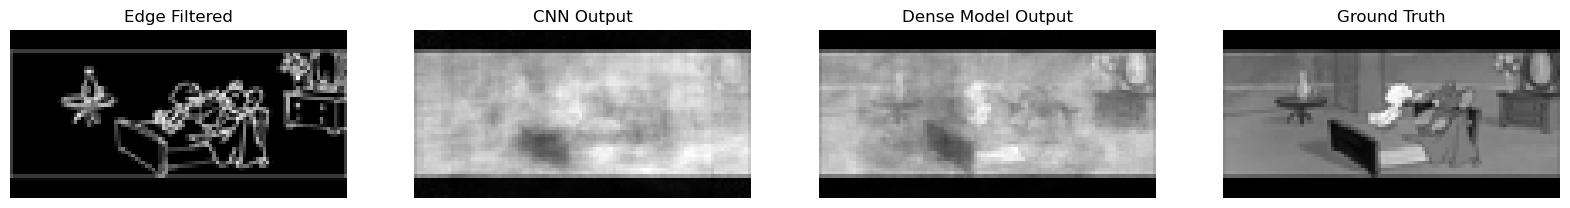

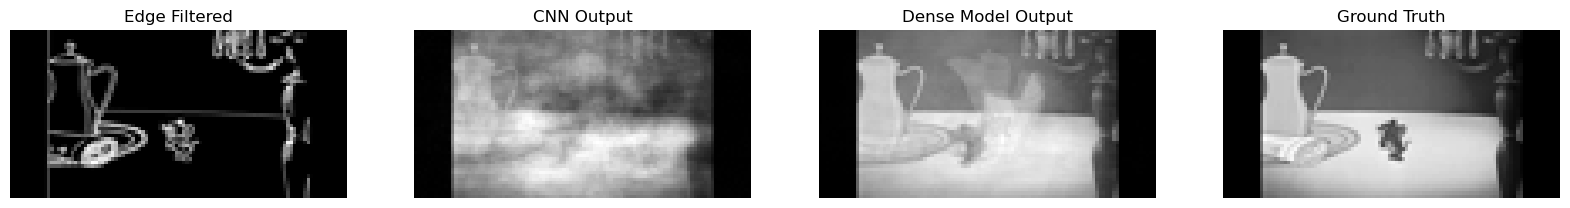

In [44]:
for i in range(len(inputImagesArray)):
    display_images(inputImagesArray[i], cnn_model_output[i], dense_model_output[i], outputImagesArray[i])